In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

os.chdir("C:\\Users\\Aditya Prakash\\Documents\supermarket_ML")

df = pd.read_csv("supermarket_sales.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [261]:
#copying the dataset so that the original data will not be lost.
df2 = df

In [262]:
#Listing all the columns of the dataset.
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [263]:
#dimensions of the dataset in the format of (number_of_rows,number_of_columns).
df.shape

(1000, 17)

In [264]:
#Converting the date column from object to datetime to perform operations
df.Date = df.Date.astype('string')
df["Date"] = pd.to_datetime(df["Date"])

In [265]:
df.Date.dtypes

dtype('<M8[ns]')

In [266]:
for i in range(0,len(df.Gender)):
    if df.iloc[i,4] == "Female":
        df.iloc[i,4] = 0
    else:
        df.iloc[i,4] = 1

In [267]:
#First 5 rows of data
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [268]:
#Inserting a new column Price_without_tax which shows the price without tax
df.insert(14,"Price_Without_Tax",df.cogs)
#Deleting the gross margin percentage column as we don't need it.
df = df.drop(["cogs","gross margin percentage"],axis = 1)

In [269]:
#Information about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Invoice ID         1000 non-null   object        
 1   Branch             1000 non-null   object        
 2   City               1000 non-null   object        
 3   Customer type      1000 non-null   object        
 4   Gender             1000 non-null   object        
 5   Product line       1000 non-null   object        
 6   Unit price         1000 non-null   float64       
 7   Quantity           1000 non-null   int64         
 8   Tax 5%             1000 non-null   float64       
 9   Total              1000 non-null   float64       
 10  Date               1000 non-null   datetime64[ns]
 11  Time               1000 non-null   object        
 12  Payment            1000 non-null   object        
 13  Price_Without_Tax  1000 non-null   float64       
 14  gross inc

In [270]:
#Description of the numerical columns like it median value (50%), mean value etc.
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Price_Without_Tax,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,11.708825,1.71858


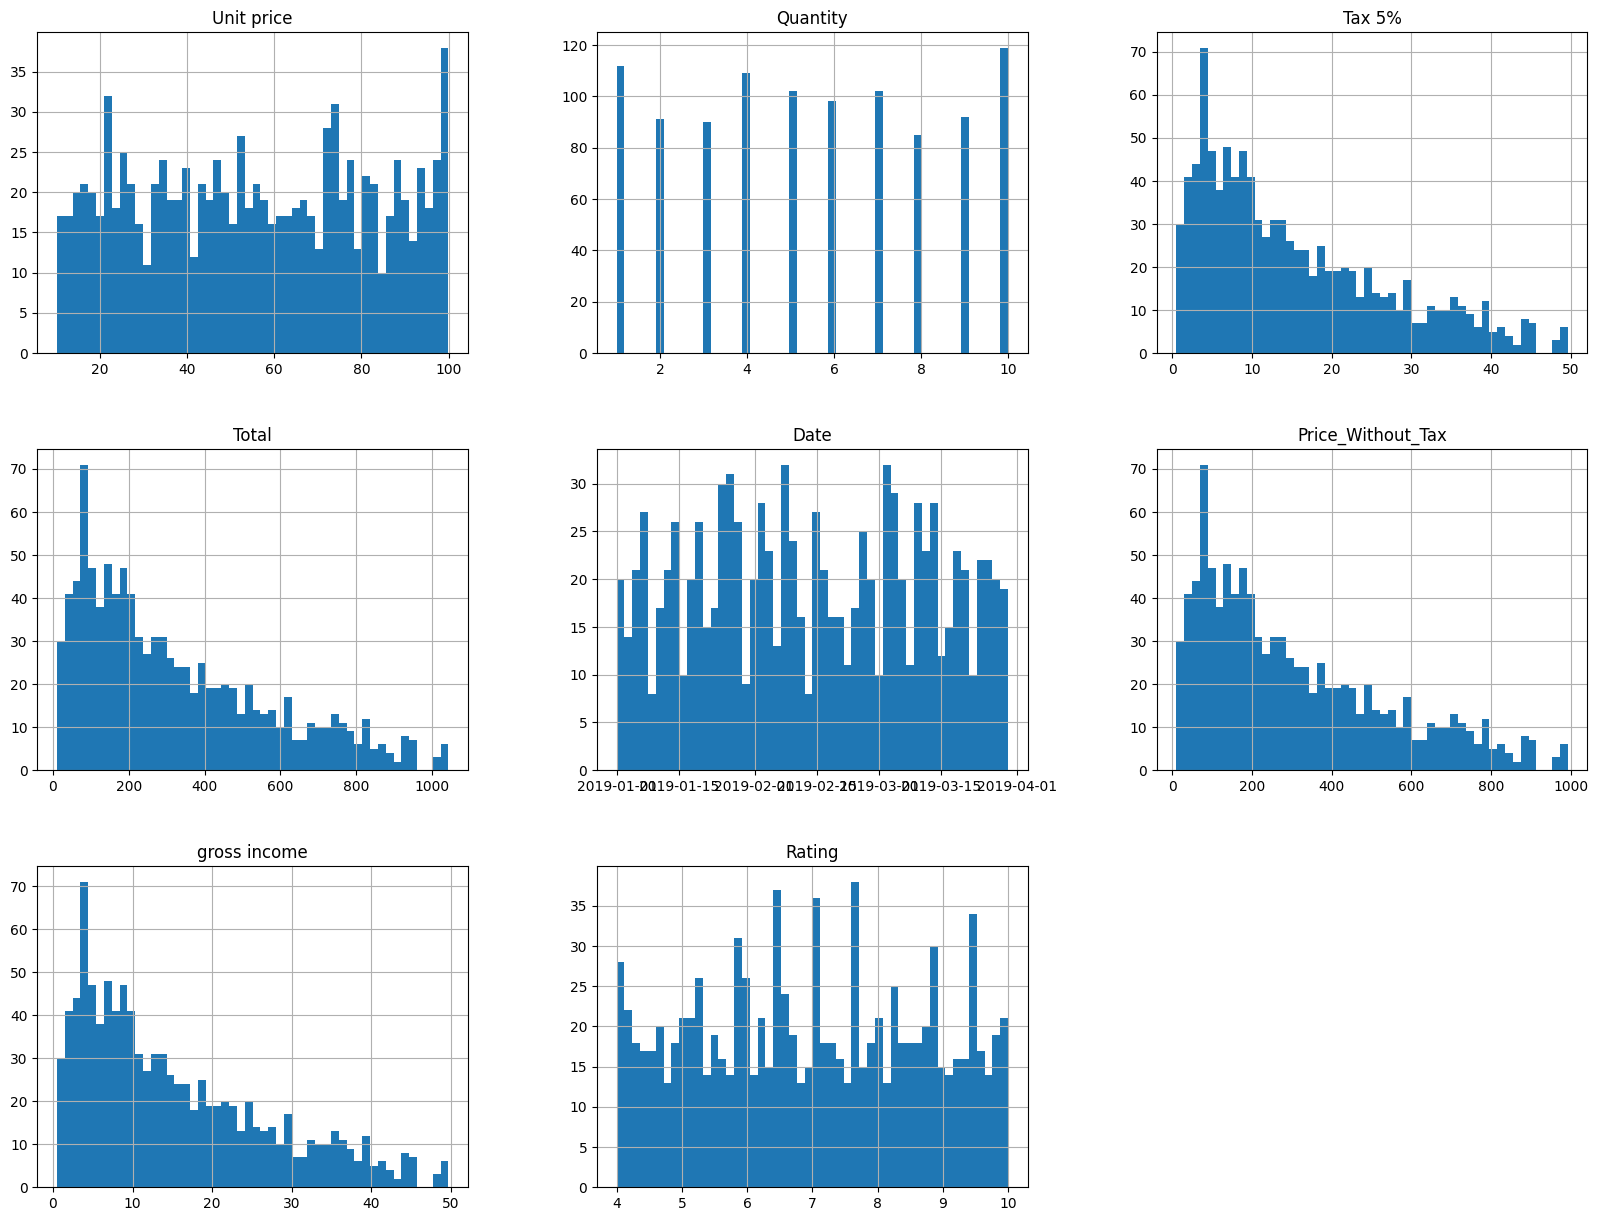

In [271]:
#Pictorial representation of frequency of numerical variables in the dataset.
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [272]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Price_Without_Tax,gross income,Rating
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,1,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,0,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,48.6900,4.4
997,727-02-1313,A,Yangon,Member,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,3.2910,4.1


In [273]:
np.unique(df.Branch)

array(['A', 'B', 'C'], dtype=object)

In [274]:
np.unique(df.City)

array(['Mandalay', 'Naypyitaw', 'Yangon'], dtype=object)

In [275]:
np.unique(df["Customer type"])

array(['Member', 'Normal'], dtype=object)

In [276]:
np.unique(df["Product line"])

array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)

In [277]:
np.unique(df["Payment"])

array(['Cash', 'Credit card', 'Ewallet'], dtype=object)

In [278]:
df["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [279]:
df["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [280]:
pd.crosstab(index = df["Product line"], columns = 'count')

col_0,count
Product line,
Electronic accessories,170
Fashion accessories,178
Food and beverages,174
Health and beauty,152
Home and lifestyle,160
Sports and travel,166


In [281]:
pd.crosstab(df.Quantity,df.Gender)

Gender,0,1
Quantity,,
1,45,67
2,44,47
3,41,49
4,55,54
5,56,46
6,50,48
7,49,53
8,42,43
9,56,36


In [282]:
pd.crosstab(df["Product line"], df["Gender"])

Gender,0,1
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


In [283]:
pd.crosstab(df.Branch,df.Gender)

Gender,0,1
Branch,,
A,161,179
B,162,170
C,178,150


From the above table we can assume that C (Naypyitaw) serves mostly female customers while A (Yangon) and B (Mandalay) serves mostly male customers.

In [284]:
pd.crosstab(df["Product line"], df["Branch"],margins = True)

Branch,A,B,C,All
Product line,,,,
Electronic accessories,60,55,55,170
Fashion accessories,51,62,65,178
Food and beverages,58,50,66,174
Health and beauty,47,53,52,152
Home and lifestyle,65,50,45,160
Sports and travel,59,62,45,166
All,340,332,328,1000


In [285]:
categorical = df.select_dtypes(exclude = [object])
categorical.corr()

,Unit price,Quantity,Tax 5%,Total,Date,Price_Without_Tax,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,-0.006473,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,-0.029563,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442
Date,-0.006473,-0.029563,-0.022899,-0.022899,1.000000,-0.022899,-0.022899,-0.043467
Price_Without_Tax,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,-0.022899,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.043467,-0.036442,-0.036442,1.000000


Text(0.5, 1.0, 'Ratings by Branch')

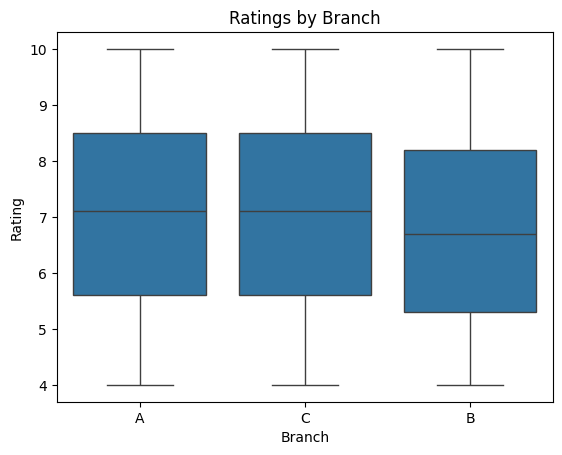

In [286]:
sns.boxplot(x='Branch',y='Rating',data=df).set_title("Ratings by Branch")

<Axes: xlabel='count', ylabel='Product line'>

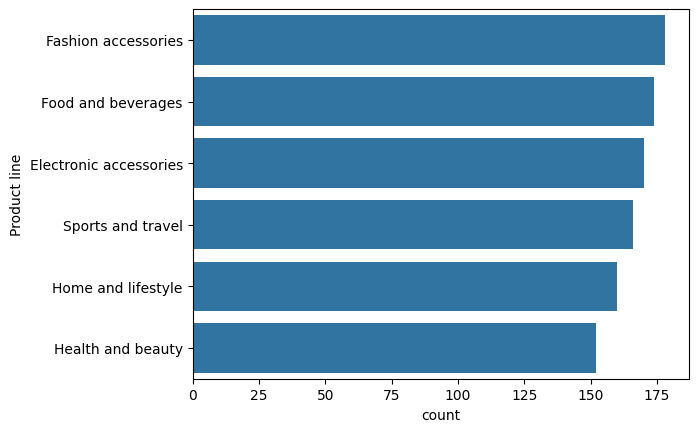

In [287]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

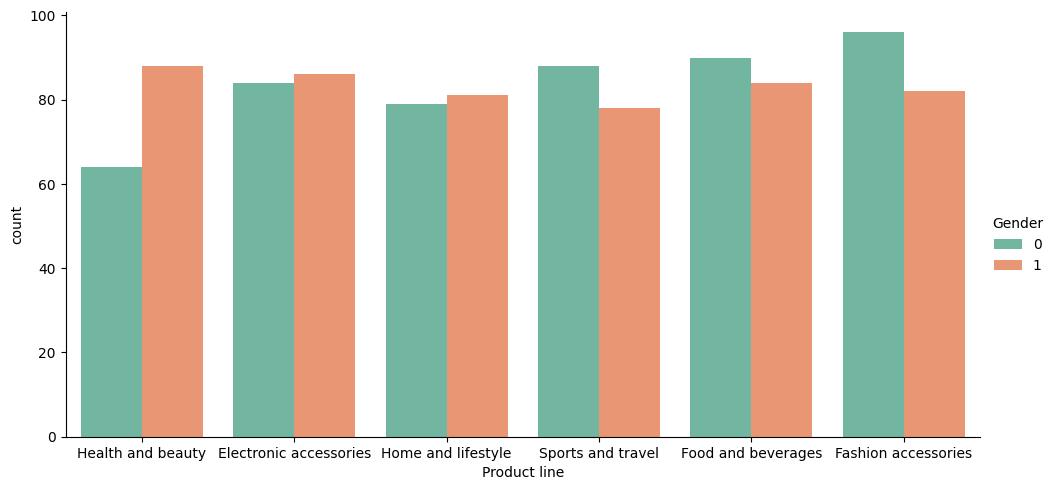

In [288]:
f = np.array(df["Product line"].value_counts())
sns.catplot(data=df, x = "Product line", hue = "Gender", palette = "Set2",kind = "count", height = 5 , aspect = 2)

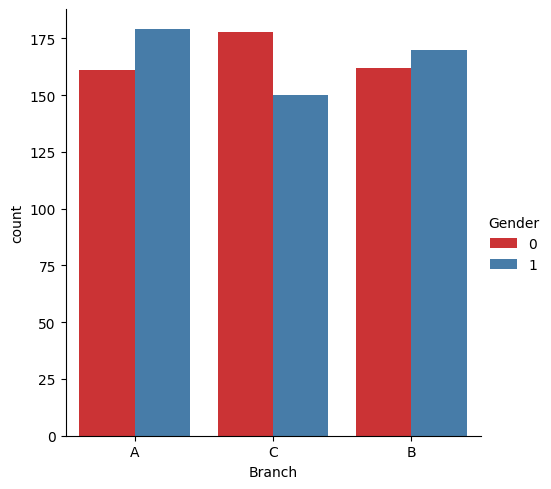

<Figure size 200x500 with 0 Axes>

In [289]:
sns.catplot(data=df,x="Branch",hue="Gender",palette="Set1",kind="count")
plt.figure(figsize=(2,5)) 
plt.show()

In [290]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Price_Without_Tax,gross income,Rating
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,1,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,0,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,48.6900,4.4
997,727-02-1313,A,Yangon,Member,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,3.2910,4.1


In [291]:
#Separating the data of all the branches
dfA = df[df.Branch == 'A']
dfB = df[df.Branch == 'B']
dfC = df[df.Branch == 'C']

In [292]:
dfA

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Price_Without_Tax,gross income,Rating
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3
6,355-53-5943,A,Yangon,Member,0,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,0,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06,Credit card,282.80,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,1,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,5.8030,8.8
997,727-02-1313,A,Yangon,Member,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,3.2910,4.1


In [293]:
pd.crosstab(dfA["Product line"], dfA.Quantity, margins = True)

Quantity,1,2,3,4,5,6,7,8,9,10,All
Product line,,,,,,,,,,,
Electronic accessories,9,3,7,6,6,4,9,5,5,6,60
Fashion accessories,11,4,4,5,5,1,5,4,6,6,51
Food and beverages,3,6,8,4,11,8,5,3,4,6,58
Health and beauty,4,3,5,6,9,3,5,3,4,5,47
Home and lifestyle,5,6,5,9,4,11,3,8,8,6,65
Sports and travel,4,6,5,7,9,4,9,2,4,9,59
All,36,28,34,37,44,31,36,25,31,38,340


In [294]:
dfA["Customer type"].value_counts()

Customer type
Normal    173
Member    167
Name: count, dtype: int64

<Figure size 2000x500 with 0 Axes>

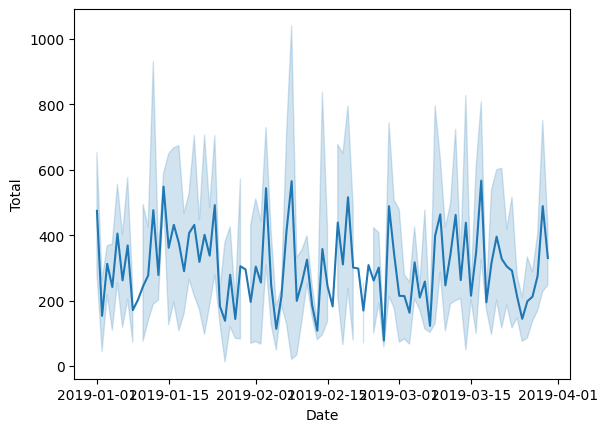

<Figure size 2000x500 with 0 Axes>

In [295]:
sns.lineplot(x = dfA.Date, y = dfA.Total)
plt.figure(figsize=(20,5)) 

In [296]:
#sns.pairplot(dfA, kind = "scatter", hue = "Product line")
#plt.show()

In [297]:
dummies = pd.get_dummies(dfA["Product line"])
dfA = pd.concat([dfA, dummies], axis = 1)
dfA

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,Price_Without_Tax,gross income,Rating,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,26.1415,9.1,False,False,False,True,False,False
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,16.2155,7.4,False,False,False,False,True,False
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,23.2880,8.4,False,False,False,True,False,False
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,30.2085,5.3,False,False,False,False,False,True
6,355-53-5943,A,Yangon,Member,0,Electronic accessories,68.84,6,20.6520,433.6920,...,Ewallet,413.04,20.6520,5.8,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,0,Food and beverages,56.56,5,14.1400,296.9400,...,Credit card,282.80,14.1400,4.5,False,False,True,False,False,False
992,745-74-0715,A,Yangon,Normal,1,Electronic accessories,58.03,2,5.8030,121.8630,...,Ewallet,116.06,5.8030,8.8,True,False,False,False,False,False
997,727-02-1313,A,Yangon,Member,1,Food and beverages,31.84,1,1.5920,33.4320,...,Cash,31.84,1.5920,7.7,False,False,True,False,False,False
998,347-56-2442,A,Yangon,Normal,1,Home and lifestyle,65.82,1,3.2910,69.1110,...,Cash,65.82,3.2910,4.1,False,False,False,False,True,False


In [298]:
dfA = dfA.drop(["Invoice ID","Branch","City","Customer type", "Sports and travel"], axis = 1)

In [299]:
dfA

,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Price_Without_Tax,gross income,Rating,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle
0,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1,False,False,False,True,False
2,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,False,False,False,False,True
3,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4,False,False,False,True,False
4,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3,False,False,False,False,False
6,0,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,20.6520,5.8,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06,Credit card,282.80,14.1400,4.5,False,False,True,False,False
992,1,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,5.8030,8.8,True,False,False,False,False
997,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,1.5920,7.7,False,False,True,False,False
998,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,3.2910,4.1,False,False,False,False,True


In [300]:
lr = LinearRegression()
x = dummies.drop(["Sports and travel"], axis = 1)
x = dfA.Date.values
y = dfA.Total.values
x

array(['2019-01-05T00:00:00.000000000', '2019-03-03T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-02-08T00:00:00.000000000',
       '2019-02-25T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-02-12T00:00:00.000000000', '2019-02-07T00:00:00.000000000',
       '2019-03-29T00:00:00.000000000', '2019-03-11T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-01-21T00:00:00.000000000',
       '2019-02-17T00:00:00.000000000', '2019-03-02T00:00:00.000000000',
       '2019-03-22T00:00:00.000000000', '2019-03-10T00:00:00.000000000',
       '2019-03-15T00:00:00.000000000', '2019-03-15T00:00:00.000000000',
       '2019-03-10T00:00:00.000000000', '2019-01-15T00:00:00.000000000',
       '2019-02-10T00:00:00.000000000', '2019-03-27T00:00:00.000000000',
       '2019-02-07T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-13T00:00:00.000000000',
       '2019-01-24T00:00:00.000000000', '2019-02-02

In [301]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [302]:
t1 = test_x
t1

array(['2019-01-14T00:00:00.000000000', '2019-03-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-02-24T00:00:00.000000000',
       '2019-03-19T00:00:00.000000000', '2019-03-11T00:00:00.000000000',
       '2019-03-10T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-03-19T00:00:00.000000000', '2019-01-09T00:00:00.000000000',
       '2019-01-28T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-03-22T00:00:00.000000000', '2019-03-03T00:00:00.000000000',
       '2019-02-17T00:00:00.000000000', '2019-01-17T00:00:00.000000000',
       '2019-01-24T00:00:00.000000000', '2019-02-17T00:00:00.000000000',
       '2019-02-10T00:00:00.000000000', '2019-03-22T00:00:00.000000000',
       '2019-02-17T00:00:00.000000000', '2019-02-07T00:00:00.000000000',
       '2019-02-03T00:00:00.000000000', '2019-01-19T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-03-26T00:00:00.000000000',
       '2019-02-08T00:00:00.000000000', '2019-02-25

In [303]:
train_x = train_x.reshape(-1,1)
train_x = train_x.astype(np.float64)
train_x = train_x.reshape(-1,1)

In [304]:
test_x = test_x.reshape(-1,1)
test_x = test_x.astype(np.float64)
test_x = test_x.reshape(-1,1)
test_x

array([[1.5474240e+18],
       [1.5532128e+18],
       [1.5482016e+18],
       [1.5509664e+18],
       [1.5529536e+18],
       [1.5522624e+18],
       [1.5521760e+18],
       [1.5463008e+18],
       [1.5529536e+18],
       [1.5469920e+18],
       [1.5486336e+18],
       [1.5466464e+18],
       [1.5532128e+18],
       [1.5515712e+18],
       [1.5503616e+18],
       [1.5476832e+18],
       [1.5482880e+18],
       [1.5503616e+18],
       [1.5497568e+18],
       [1.5532128e+18],
       [1.5503616e+18],
       [1.5494976e+18],
       [1.5491520e+18],
       [1.5478560e+18],
       [1.5475104e+18],
       [1.5535584e+18],
       [1.5495840e+18],
       [1.5510528e+18],
       [1.5528672e+18],
       [1.5536448e+18],
       [1.5535584e+18],
       [1.5485472e+18],
       [1.5503616e+18],
       [1.5485472e+18],
       [1.5471648e+18],
       [1.5471648e+18],
       [1.5483744e+18],
       [1.5470784e+18],
       [1.5476832e+18],
       [1.5505344e+18],
       [1.5492384e+18],
       [1.551052

In [305]:
lr.fit(train_x,train_y)

LinearRegression()

In [306]:
lr.coef_

array([3.82948446e-16])

In [307]:
lr.intercept_

-274.2948798538449

In [308]:
#Object_test_x = test_x.astype("object")
prediction = lr.predict(test_x)

In [309]:
prediction

array([318.28873593, 320.50554789, 318.58651664, 319.64529251,
       320.40628766, 320.14159369, 320.10850695, 317.85860824,
       320.40628766, 318.1233022 , 318.75195037, 317.99095522,
       320.50554789, 319.87689973, 319.41368529, 318.38799617,
       318.61960339, 319.41368529, 319.18207807, 320.50554789,
       319.41368529, 319.08281783, 318.95047085, 318.45416966,
       318.32182268, 320.63789488, 319.11590457, 319.67837925,
       320.37320091, 320.67098162, 320.63789488, 318.71886363,
       319.41368529, 318.71886363, 318.18947569, 318.18947569,
       318.65269013, 318.15638895, 318.38799617, 319.47985878,
       318.98355759, 319.67837925, 320.53863464, 318.88429735,
       320.30702742, 320.67098162, 320.0754202 , 317.85860824,
       319.81072623, 320.67098162, 319.90998647, 318.18947569,
       320.10850695, 320.67098162, 318.09021546, 319.97615996,
       318.09021546, 318.5534299 , 319.08281783, 319.24825156,
       318.81812386, 318.71886363, 319.08281783, 319.28

In [310]:
test_y

array([ 588.42  ,   99.9075,   32.1405,  100.128 ,   97.818 ,  125.517 ,
        184.107 ,  779.31  ,  171.7275,  202.335 ,  203.112 ,  297.108 ,
         19.194 ,  186.228 ,  290.0835,   80.955 ,  827.085 ,  926.9505,
         77.7735,  391.419 ,  680.064 ,   47.859 ,  764.19  ,  323.064 ,
        175.917 ,   54.999 , 1039.29  ,  205.317 ,  174.615 ,  167.034 ,
         56.1225,   76.923 ,  745.836 ,  514.773 ,  345.786 ,   72.3975,
        252.042 ,  493.794 ,  432.9885,  266.6475,  185.367 ,   66.8745,
        465.444 ,  510.972 ,  333.9525,  164.871 ,  548.73  ,  399.756 ,
         72.933 ,   93.114 ,   76.755 ,   94.1745,   81.396 ,  272.664 ,
        250.7085,   83.727 ,   26.796 ,   96.642 ,  453.495 ,  246.4875,
        295.407 ,   25.263 ,  752.64  ,   80.661 ,   26.5545,  339.36  ,
        217.6335,   76.356 ,  181.44  ,  187.32  ,  182.91  ,  202.818 ,
        214.137 ,  160.209 ,  191.247 ,  326.256 ,  204.246 ,  477.54  ,
        156.03  ,  921.186 ,  852.705 ,  432.768 , 

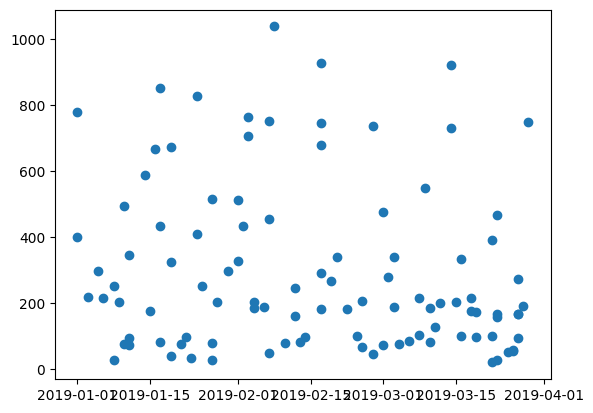

In [311]:
plt.scatter(t1,test_y)

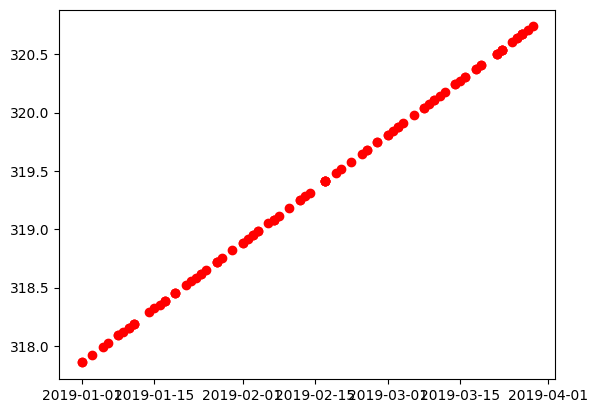

In [312]:
plt.scatter(t1,prediction,color = 'red')

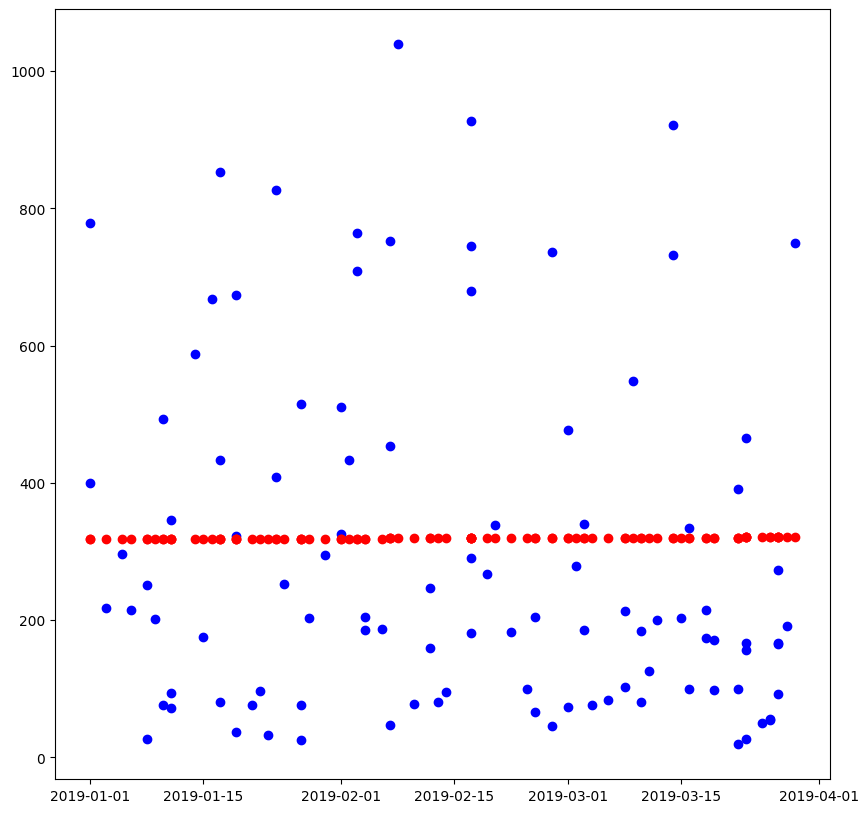

In [313]:
plt.figure(figsize = (10,10))
plt.scatter(t1,test_y,color = 'blue')
plt.scatter(t1,prediction,color = 'red')